Preprocess the data: Tokenize and pad sequences.
Create embeddings: Use word2vec and fastText.
Build models: Define the architectures for the neural network and the CNNs.
Train and evaluate models: Train each model and evaluate its performance

Step 1: Preprocess the Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


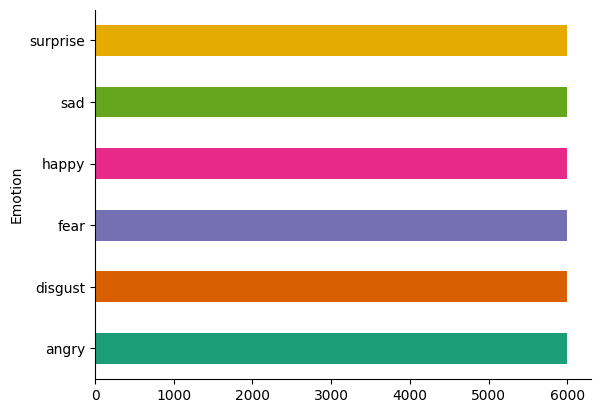

In [4]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [6]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [7]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [8]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [9]:
X = df['filtered_text']

In [10]:
y = df['Emotion_label']

In [11]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from gensim.models import Word2Vec

# Train Word2Vec model on the training data
word2vec_model = Word2Vec(sentences=x_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to Word2Vec embeddings
def text_to_embedding(text, model, max_length):
    embedding = []
    for word in text:
        if word in model.wv:
            embedding.append(model.wv[word])
        else:
            embedding.append([0] * model.vector_size)
    if len(embedding) < max_length:
        embedding.extend([[0] * model.vector_size] * (max_length - len(embedding)))
    return embedding[:max_length]

# Set the maximum sequence length
max_sequence_length = 100

# Convert texts to embeddings
x_train_emb = np.array([text_to_embedding(text, word2vec_model, max_sequence_length) for text in x_train])
x_test_emb = np.array([text_to_embedding(text, word2vec_model, max_sequence_length) for text in x_test])


##simple RNN

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import Masking

# Define the RNN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(SimpleRNN(units=128))
model.add(Dense(units= 6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=20, batch_size=32, validation_split=0.2)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_8 (Masking)         (None, 100, 100)          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense_10 (Dense)            (None, 6)                 774       
                                                                 
Total params: 30086 (117.52 KB)
Trainable params: 30086 (117.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
720/720 [==============================] - 22s 29ms/step - loss: 1.6966 - accuracy: 0.3013 - val_loss: 1.6090 - val_accuracy: 0.3592
Epoch 2/20
720/720 [==============================] - 20s 28ms/step - loss: 1.4785 - accuracy: 0.4306 - val_loss: 1.4259 - val_accuracy:

In [26]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 2s 9ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1226
           1       0.72      0.71      0.72      1188
           2       0.78      0.77      0.77      1129
           3       0.65      0.65      0.65      1246
           4       0.48      0.49      0.48      1244
           5       0.73      0.77      0.75      1167

    accuracy                           0.66      7200
   macro avg       0.66      0.66      0.66      7200
weighted avg       0.66      0.66      0.66      7200



##RNN(LSTM)

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Masking, Bidirectional

# Define the BiLSTM model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               233472    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 235014 (918.02 KB)
Trainable params: 235014 (918.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
720/720 [==============================] - 53s 69ms/step - loss: 1.8428 - accuracy: 0.2503 - val_loss: 1.7152 - val_accuracy: 0.2743
Epoch 2/10
720/720 [==============================] - 49s 68ms/step 

In [16]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 6s 23ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1226
           1       0.59      0.72      0.65      1188
           2       0.68      0.71      0.69      1129
           3       0.62      0.58      0.60      1246
           4       0.45      0.33      0.38      1244
           5       0.63      0.70      0.66      1167

    accuracy                           0.59      7200
   macro avg       0.58      0.59      0.59      7200
weighted avg       0.58      0.59      0.58      7200



#CNN

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Masking

# Define the CNN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))  # Assuming input_shape remains the same

# Add convolutional layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))

# Add max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add fully connected (Dense) layer
model.add(Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 100, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 128)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               819328    
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [18]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 1s 4ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1226
           1       0.85      0.87      0.86      1188
           2       0.88      0.86      0.87      1129
           3       0.87      0.77      0.82      1246
           4       0.71      0.70      0.70      1244
           5       0.81      0.90      0.85      1167

    accuracy                           0.81      7200
   macro avg       0.82      0.82      0.82      7200
weighted avg       0.82      0.81      0.81      7200



#CNN+BiLSTM

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Embedding, Masking, Bidirectional, LSTM

# Define the CNN-BiLSTM model
model = Sequential()

# Masking layer to handle padding
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Output layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_5 (Masking)         (None, 100, 100)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 128)          64128     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 50, 128)           82048     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 25, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)              

In [22]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 2s 9ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1226
           1       0.83      0.84      0.84      1188
           2       0.88      0.88      0.88      1129
           3       0.83      0.84      0.83      1246
           4       0.70      0.70      0.70      1244
           5       0.83      0.89      0.86      1167

    accuracy                           0.82      7200
   macro avg       0.82      0.82      0.82      7200
weighted avg       0.82      0.82      0.82      7200

